In [1]:
import os, sys, glob
import pickle as pkl
from pathlib import Path
import yaml, json
import importlib
import fnmatch
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2 as cv

In [2]:
%cd ..
ROOT_DIR = os.getcwd()

c:\MLprojects\human_motion_analysis


In [3]:
print(cv.__version__)
print(cv.getBuildInformation())

4.7.0

General configuration for OpenCV 4.7.0 =====================================
  Version control:               4.7.0

  Platform:
    Timestamp:                   2022-12-29T19:12:01Z
    Host:                        Windows 10.0.17763 AMD64
    CMake:                       3.24.2
    CMake generator:             Visual Studio 14 2015
    CMake build tool:            MSBuild.exe
    MSVC:                        1900
    Configuration:               Debug Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (4 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (32 files):           + SSSE3 S

In [36]:
def encode_video(images, out_path, fps=25, image_size=(224, 224)):
	"""Encodes a video from a sequence of frames."""
	images = images.astype(np.uint8)
	fourcc = cv.VideoWriter_fourcc(*'H264')
	writer = cv.VideoWriter(out_path, fourcc, fps, image_size)
	for fri in range(images.shape[0]):
		frame = cv.cvtColor(images[fri], cv.COLOR_BGR2RGB)
		writer.write(frame)
	writer.release()

In [54]:
def encode_video(images, out_path, fps=25, image_size=(224, 224)):
	"""Encodes a video from a sequence of frames."""
	images = images.astype(np.uint8)
	# fourcc = cv.VideoWriter_fourcc(*'H264')
	# fourcc = cv.VideoWriter_fourcc(*'MP4V')
	# fourcc = cv.VideoWriter_fourcc(*'mp4v')
	# fourcc = cv.VideoWriter_fourcc(*'avc1')
	# fourcc = cv.VideoWriter_fourcc(*'X264')
	fourcc = cv.VideoWriter_fourcc(*'HEVC')
	writer = cv.VideoWriter(out_path, fourcc, fps, image_size)
	for fri in range(images.shape[0]):
		frame = cv.cvtColor(images[fri], cv.COLOR_BGR2RGB)
		writer.write(frame)
	writer.release()

In [4]:
import imageio

def encode_video(images, out_path, fps=25, image_size=(224, 224)):
    """Encodes a video from a sequence of frames."""
    images = images.astype(np.uint8)
    writer = imageio.get_writer(out_path, fps=fps)
    for fri in range(images.shape[0]):
        frame = images[fri]
        writer.append_data(frame)
    writer.close()


In [5]:
# load from st processed
path = str(Path("test_examples/upload_out_images_draw.pkl"))
print(path)

test_examples\upload_out_images_draw.pkl


In [6]:
with open(path, "rb") as f:
    # out_images_draw_ = pkl.load(f)
    out_images_draw_aqa = pkl.load(f)

In [7]:
out_images_draw.shape

NameError: name 'out_images_draw' is not defined

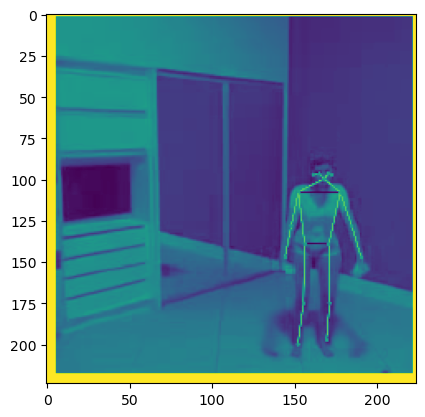

In [26]:
# show first image
plt.imshow(out_images_draw[20,:,:,2])


In [8]:
out_images_draw_aqa.shape

(85, 600, 480, 3)

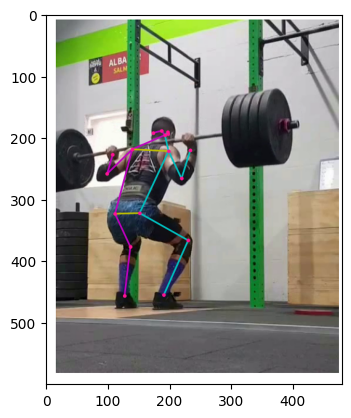

In [9]:
plt.imshow(out_images_draw_aqa[20])


In [10]:
out_images_draw_aqa[0,:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
# not working even though upstream same?
out_path = str(Path("test_examples", "test_aqa.mp4"))
encode_video(out_images_draw_aqa, out_path, fps=30, image_size=(600,480))

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (480, 600) to (480, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [59]:
!pip install imageio[ffmpeg]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 3.1 MB/s eta 0:00:0000:0100:01


In [34]:
# working
out_path = str(Path("test_examples", "test_inf.mp4"))
encode_video(out_images_draw, out_path, fps=25)

OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
[h264_videotoolbox @ 0x7f844f3c7800] Error: cannot create compression session: -12903
[h264_videotoolbox @ 0x7f844f3c7800] Try -allow_sw 1. The hardware encoder may be busy, or not supported.
[ERROR:0@1211.133] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_ffmpeg_impl.hpp (2985) open Could not open codec h264_videotoolbox, error: Unspecified error (-542398533)
[ERROR:0@1211.133] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_ffmpeg_impl.hpp (3002) open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
OpenCV: AVF: waiting to write video data.
OpenCV: AVF: waiting to write video data.
OpenCV: AVF: waiting to write video data.
OpenCV: AVF: waiting to write video data.
OpenCV: AVF: waiting to write video data.
OpenCV: AVF: waiting to write video data.

In [5]:
# load test images
path = Path("data", "compiled", "InfiniteRep_inferenced_v1.0", "videos_curl_InfiniteRep_v1.0.pkl")
with open(path, "rb") as f:
    videos_curl = pkl.load(f)


In [6]:
images = videos_curl[10].images
images.shape

(238, 224, 224, 3)

In [15]:
out_path = str(Path("test_examples", "test_2.mp4"))
encode_video(images, out_path, fps=25)

NameError: name 'images' is not defined